<a href="https://colab.research.google.com/github/cavendano01/Statistical-Learning-II/blob/main/K-means-%26-GMM/K_means_y_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd # Data Manipulation
import numpy as np # Data computation
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns; sns.set()
from sklearn import mixture #GMM
from sklearn.cluster import KMeans # Testing Sklearn
print ("Packages Loaded")

Packages Loaded


In [2]:
#Data Loading
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#Creating Heights Dataset 
heights =pd.read_excel("/content/drive/MyDrive/Statistical-Learning-II/practica-1/estaturas.xlsx")
heights.head(5)

,Estatura(metros),Edad(años)
0,1.77,26
1,1.74,31
2,1.72,24
3,1.78,34
4,1.65,32


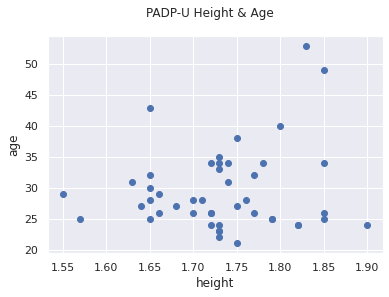

In [4]:
height =heights.iloc[:, 0]
age = heights.iloc[:, 1]
plt.scatter(height,age )
plt.suptitle('PADP-U Height & Age')
plt.xlabel('height')
plt.ylabel('age')
plt.show()

In [5]:
X = heights.values

# K-means

## Sklearn approach

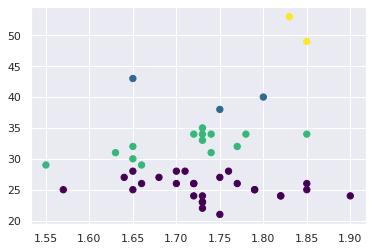

In [8]:
# Plot the data with K Means Labels
kmeans = KMeans(4, random_state=20)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

## From Scratch
Creating a Class that contains functions for:
* Hard Clustering with sklearn
* Experiment logs 

In [9]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

13.844817828776607
0.9241154104478423
4.428606906205217
1.1439829696046977
2.7206563888945663


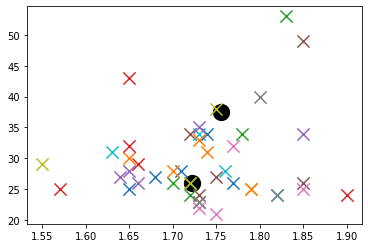

In [12]:
model = K_Means()
model.fit(X)

for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in model.classifications:
    #color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x",  s=150, linewidths=5)
        
plt.show()

# GMM

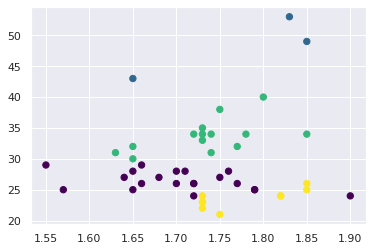

In [11]:
gmm = mixture.GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [13]:
#Means de los centroides 
print('means')
print(gmm.means_)
#print(gmm.covariances_)
print('std')
print(np.sqrt(gmm.covariances_))

means
[[ 1.70797373 26.39077418]
 [ 1.77666743 48.33324173]
 [ 1.72966228 33.28706989]
 [ 1.7775112  23.5637487 ]]
std
[[[0.07822381        nan]
  [       nan 1.62356671]]

 [[0.089943   0.56959416]
  [0.56959416 4.1097108 ]]

 [[0.05959421 0.32934493]
  [0.32934493 3.01358905]]

 [[0.05289564 0.21083731]
  [0.21083731 1.39124602]]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


# Model optimization (5 iterations) & Prediction 

## GMM Predictions with Selected Model